In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

### Import Player Shot Creating Actions Data Italia Serie A


In [76]:
datacreat = pd.read_csv("shot-creating-actions-seriea-player.csv",sep=';',encoding='latin-1')
datacreat.head()

,Rk,PlayerN,Player,NationN,Nation,Pos,Squad,SCA,SCA90,PassLiveSCA,...,DribSCA,ShSCA,FldSCA,DefSCA,GCA,GCA90,PassLiveGCA,PassDeadGCA,DribGCA,ShGCA
0,1,Tammy Abraham\f586779e,Tammy Abraham,eng ENG,ENG,FW,Roma,72,2.65,50,...,1,13,5,2,10,0.37,4,0,1,3
1,2,Francesco Acerbi\b96b595c,Francesco Acerbi,it ITA,ITA,DF,Lazio,13,0.64,10,...,0,1,1,0,1,0.05,0,0,0,0
2,3,Michel Aebischer\f9c927de,Michel Aebischer,ch SUI,SUI,MF,Bologna,2,3.40,1,...,0,0,0,1,0,0.00,0,0,0,0
3,4,Felix Afena-Gyan\0154d290,Felix Afena-Gyan,gh GHA,GHA,FW,Roma,17,2.84,11,...,1,2,2,1,2,0.33,1,0,1,0
4,5,Kevin Agudelo\46fa7204,Kevin Agudelo,co COL,COL,FWMF,Spezia,22,2.89,11,...,3,1,3,4,3,0.39,1,0,0,0


In [77]:
datacreat.drop(['Rk','PlayerN','NationN'],inplace=True,axis=1)

In [78]:
datacreat.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'SCA', 'SCA90', 'PassLiveSCA',
       'PassDeadSCA', 'DribSCA', 'ShSCA', 'FldSCA', 'DefSCA', 'GCA', 'GCA90',
       'PassLiveGCA', 'PassDeadGCA', 'DribGCA', 'ShGCA'],
      dtype='object')

### Description of Data Columns

Player - Player Name

Pos - Position

Squad - Team Name

SCA - Shot Creating Actions(Total)

SCA90 - Shot Creating Actions per90

PassLiveSCA - Open Play Shot Creating Actions

PassDeadSCA- Dead Play Shot Creating Actions

DribSCA- Successfull Dribble + Shot Creating Actions

DefSCA - Defensive Actions / Shot Creating Actions

GCA - Goal Creating Actions

GCA90 - Goal Creating Actions per90

PassLiveGCA - Open Play Goal Creating Actions

PassDeadGCA- Dead Play Goal Creating Actions


In [79]:
datacreat.Pos.unique()

array(['FW', 'DF', 'MF', 'FWMF', 'MFFW', 'MFDF', 'GK', 'DFMF', 'DFFW',
       'FWDF'], dtype=object)

In [80]:
datacreat1 = datacreat.loc[datacreat["SCA"] >=10 ]
datacreat1.head()

,Player,Nation,Pos,Squad,SCA,SCA90,PassLiveSCA,PassDeadSCA,DribSCA,ShSCA,FldSCA,DefSCA,GCA,GCA90,PassLiveGCA,PassDeadGCA,DribGCA,ShGCA
0,Tammy Abraham,ENG,FW,Roma,72,2.65,50,1,1,13,5,2,10,0.37,4,0,1,3
1,Francesco Acerbi,ITA,DF,Lazio,13,0.64,10,1,0,1,1,0,1,0.05,0,0,0,0
3,Felix Afena-Gyan,GHA,FW,Roma,17,2.84,11,0,1,2,2,1,2,0.33,1,0,1,0
4,Kevin Agudelo,COL,FWMF,Spezia,22,2.89,11,0,3,1,3,4,3,0.39,1,0,0,0
5,Ola Aina,NGA,DF,Torino,26,2.20,23,1,2,0,0,0,0,0.00,0,0,0,0


In [81]:
datacreat1.Pos.unique()

array(['FW', 'DF', 'FWMF', 'MF', 'MFDF', 'MFFW', 'DFMF', 'DFFW', 'FWDF'],
      dtype=object)

In [82]:
datacreat1.describe().T

,count,mean,std,min,25%,50%,75%,max
SCA,317.0,34.678233,22.267589,10.00,17.00,29.00,46.00,121.00
SCA90,317.0,2.426625,1.205323,0.39,1.50,2.34,3.13,7.54
PassLiveSCA,317.0,25.217666,15.652070,2.00,12.00,22.00,34.00,93.00
PassDeadSCA,317.0,3.050473,5.954785,0.00,0.00,1.00,3.00,39.00
DribSCA,317.0,1.731861,2.133376,0.00,0.00,1.00,3.00,17.00
ShSCA,317.0,2.031546,2.220221,0.00,0.00,1.00,3.00,13.00
FldSCA,317.0,1.772871,2.048191,0.00,0.00,1.00,3.00,12.00
DefSCA,317.0,0.873817,1.047832,0.00,0.00,1.00,1.00,4.00
GCA,317.0,3.886435,3.371470,0.00,1.00,3.00,5.00,18.00
GCA90,317.0,0.270442,0.213692,0.00,0.12,0.23,0.38,1.03


In [69]:
datacreat1.SCA.max()

121

In [70]:
datacreat1.SCA.mean()

34.678233438485805

In [119]:
dataabr= datacreat[datacreat['Player'] == 'Tammy Abraham']
datapel= datacreat[datacreat['Player'] == 'Lorenzo Pellegrini']
datahak= datacreat[datacreat['Player'] == 'Hakan Calhanoglu']
databar= datacreat[datacreat['Player'] == 'Nicolo Barella']


In [90]:
scavaluebar= (databar.SCA.max()/datacreat1.SCA.max())*100
scavaluebar

80.99173553719008

In [92]:
scavaluehak= (datahak.SCA.max()/datacreat1.SCA.max())*100
scavaluehak

85.12396694214877

In [93]:
scavaluepel= (datapel.SCA.max()/datacreat1.SCA.max())*100
scavaluepel

85.9504132231405

In [95]:
scavalueabr= (dataabr.SCA.max()/datacreat1.SCA.max())*100
scavalueabr

59.50413223140496

## Shot-Creating Action(SCA) Values

Nicolo Barella - %80,99

Hakan C - %85,12

Lorenzo Pellegrini - %85.95


In [97]:
gcavaluebar = (databar.GCA.max()/datacreat1.GCA.max())*100
gcavaluebar

88.88888888888889

In [98]:
gcavaluehak = (datahak.GCA.max()/datacreat1.GCA.max())*100
gcavaluehak

72.22222222222221

In [99]:
gcavaluepel = (datapel.GCA.max()/datacreat1.GCA.max())*100
gcavaluepel

50.0

In [100]:
gcavalueabr = (dataabr.GCA.max()/datacreat1.GCA.max())*100
gcavalueabr

55.55555555555556

## Goal - Creating Action(GCA) Values

Nicolo Barella - %88.88

Hakan C - %72.22

Lorenzo Pellegrini - %50.0

### Import Player Standard Stats Data Italia Serie A


In [133]:
datastat = pd.read_csv("standard-stats-seriea-player.csv",sep=';',encoding='latin-1')
datastat.head()

,Rk,PlayerN,Player,NationN,Nation,Pos,Squad,MP,Starts,Min,...,GAmPK,xG,npxG,xA,npxGxA,xG90,xA90,xGxA90,npxG90,npxGxA90
0,1,Tammy Abraham\f586779e,Tammy Abraham,eng ENG,ENG,FW,Roma,29,29,2446,...,0.59,18.0,16.5,3.2,19.7,0.66,0.12,0.78,0.61,0.73
1,2,Francesco Acerbi\b96b595c,Francesco Acerbi,it ITA,ITA,DF,Lazio,22,21,1816,...,0.15,1.3,1.3,0.4,1.6,0.06,0.02,0.08,0.06,0.08
2,3,Michel Aebischer\f9c927de,Michel Aebischer,ch SUI,SUI,MF,Bologna,4,0,53,...,0.00,0.0,0.0,0.1,0.1,0.00,0.11,0.11,0.00,0.11
3,4,Felix Afena-Gyan\0154d290,Felix Afena-Gyan,gh GHA,GHA,FW,Roma,14,4,539,...,0.33,1.6,1.6,0.2,1.8,0.26,0.03,0.30,0.26,0.30
4,5,Kevin Agudelo\46fa7204,Kevin Agudelo,co COL,COL,FWMF,Spezia,15,5,685,...,0.26,1.4,1.4,0.6,2.0,0.19,0.08,0.27,0.19,0.27


In [134]:
datastat.drop(['Rk','PlayerN','NationN'],inplace=True,axis=1)

In [135]:
datastat.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'GmPK', 'PK', 'PKatt', 'Gls90', 'Ast90', 'GA90', 'GmPK90',
       'GAmPK', 'xG', 'npxG', 'xA', 'npxGxA', 'xG90', 'xA90', 'xGxA90',
       'npxG90', 'npxGxA90'],
      dtype='object')

### Description of data columns

MP - Match Play

Gls - Total Goals

Ast - Total Assists

GmPK - Non-Penalty Goals

PK- Penalty Kicks

PKatt - Penalty Kicks Attempted

Gls90 - Goals per 90

GA90 - Goals and Assist per 90

GmPK - Non-Penalty Goals per 90

GAmPK- Non-Penalty Goals and Assist per 90

xG- Total Goal Expectancy

xA - xG Assisted

npxG - Non Penalty Total Goal Expectancy

xG90 - Goal Expectancy per 90

xA90 - xG Asisted per 90

npxG - Non Penalty Goal Expectancy per 90

In [242]:
datastat1 = datastat.loc[datastat["xG"] >=1.0 ]
datastat2 = datastat1.loc[datastat["Gls"] >=1 ]

In [243]:
datastat2.describe().T

,count,mean,std,min,25%,50%,75%,max
MP,191.0,22.204188,5.916541,2.00,19.500,24.00,27.000,30.00
Starts,191.0,16.565445,7.449102,0.00,11.000,17.00,23.000,30.00
Min,191.0,1461.795812,604.078555,58.00,971.000,1522.00,1953.500,2608.00
90s,191.0,16.245026,6.713566,0.60,10.750,16.90,21.700,29.00
Gls,191.0,3.958115,3.413337,1.00,2.000,3.00,5.000,21.00
Ast,191.0,1.759162,1.819372,0.00,0.000,1.00,3.000,9.00
GmPK,191.0,3.518325,2.872452,0.00,1.000,3.00,4.000,15.00
PK,191.0,0.439791,1.121694,0.00,0.000,0.00,0.000,6.00
PKatt,191.0,0.565445,1.382088,0.00,0.000,0.00,0.000,9.00
Gls90,191.0,0.277592,0.280799,0.03,0.120,0.21,0.360,3.10


In [138]:
datastat2.shape

(191, 27)

In [139]:
datastat2.GmPK.max()

15

In [140]:
datastat2.npxG.max()

16.5

In [141]:
datastat2.Ast.max()

9

In [142]:
datastat2.xA.max()

7.0

In [143]:
datastat2

,Player,Nation,Pos,Squad,MP,Starts,Min,90s,Gls,Ast,...,GAmPK,xG,npxG,xA,npxGxA,xG90,xA90,xGxA90,npxG90,npxGxA90
0,Tammy Abraham,ENG,FW,Roma,29,29,2446,27.2,15,3,...,0.59,18.0,16.5,3.2,19.7,0.66,0.12,0.78,0.61,0.73
1,Francesco Acerbi,ITA,DF,Lazio,22,21,1816,20.2,3,0,...,0.15,1.3,1.3,0.4,1.6,0.06,0.02,0.08,0.06,0.08
3,Felix Afena-Gyan,GHA,FW,Roma,14,4,539,6.0,2,0,...,0.33,1.6,1.6,0.2,1.8,0.26,0.03,0.30,0.26,0.30
4,Kevin Agudelo,COL,FWMF,Spezia,15,5,685,7.6,2,0,...,0.26,1.4,1.4,0.6,2.0,0.19,0.08,0.27,0.19,0.27
8,Luis Alberto,ESP,MF,Lazio,27,21,1883,20.9,4,7,...,0.53,3.0,3.0,5.5,8.5,0.14,0.26,0.41,0.14,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Davide Zappacosta,ITA,DF,Atalanta,25,21,1593,17.7,1,3,...,0.23,1.6,1.6,2.7,4.3,0.09,0.15,0.24,0.09,0.24
598,Piotr Zieli?ski,POL,MF,Napoli,28,23,1763,19.6,5,5,...,0.51,2.9,2.9,2.9,5.8,0.15,0.15,0.30,0.15,0.30
602,Szymon ?urkowski,POL,MF,Empoli,28,22,1763,19.6,5,1,...,0.31,3.9,3.9,1.2,5.1,0.20,0.06,0.26,0.20,0.26
603,Milan ?uri?,BIH,FW,Salernitana,25,15,1512,16.8,4,2,...,0.30,4.3,3.6,1.8,5.3,0.27,0.11,0.39,0.23,0.34


In [144]:
datastabr= datastat2[datastat2['Player'] == 'Tammy Abraham']
datastpel= datastat2[datastat2['Player'] == 'Lorenzo Pellegrini']
datasthak= datastat2[datastat2['Player'] == 'Hakan Calhanoglu']
datastbar= datastat2[datastat2['Player'] == 'Nicolo Barella']


In [147]:
npgoalsvaluebar= (datastbar.GmPK.max()/datastat2.GmPK.max())*100
npgoalsvaluebar

13.333333333333334

In [148]:
npgoalsvaluehak= (datasthak.GmPK.max()/datastat2.GmPK.max())*100
npgoalsvaluehak

26.666666666666668

In [149]:
npgoalsvaluepel= (datastpel.GmPK.max()/datastat2.GmPK.max())*100
npgoalsvaluepel

46.666666666666664

In [151]:
npgoalsvalueabr= (datastabr.GmPK.max()/datastat2.GmPK.max())*100
npgoalsvalueabr

86.66666666666667

## Non-Penalty Goals Values

Nicolo Barella - %13,33

Hakan C - %26,6

Lorenzo Pellegrini - %46,66


In [152]:
npxGvaluebar= (datastbar.npxG.max()/datastat2.npxG.max())*100
npxGvaluebar

23.030303030303028

In [153]:
npxGvaluehak= (datasthak.npxG.max()/datastat2.npxG.max())*100
npxGvaluehak

20.0

In [154]:
npxGvaluepel= (datastpel.npxG.max()/datastat2.npxG.max())*100
npxGvaluepel

33.93939393939394

In [155]:
npxGvalueabr= (datastabr.npxG.max()/datastat2.npxG.max())*100
npxGvalueabr

100.0

## Non-Penalty xG(Goal Expectancy) Values

Nicolo Barella - %23,03

Hakan C - %20,0

Lorenzo Pellegrini - %33,93


In [156]:
xAvaluebar= (datastbar.xA.max()/datastat2.xA.max())*100
xAvaluebar

82.85714285714285

In [157]:
xAvaluehak= (datasthak.xA.max()/datastat2.xA.max())*100
xAvaluehak

81.42857142857143

In [158]:
xAvaluepel= (datastpel.xA.max()/datastat2.xA.max())*100
xAvaluepel

65.71428571428571

In [160]:
xAvalueabr= (datastabr.xA.max()/datastat2.xA.max())*100
xAvalueabr

45.714285714285715

## xG Assisted(xA) Values

Nicolo Barella - %82,85

Hakan C - %81,42

Lorenzo Pellegrini - %65,71

Tammy Abraham - %45,71

In [162]:
Astvaluebar= (datastbar.Ast.max()/datastat2.Ast.max())*100
Astvaluebar

100.0

In [164]:
Astvaluehak= (datasthak.Ast.max()/datastat2.Ast.max())*100
Astvaluehak

88.88888888888889

In [165]:
Astvaluepel= (datastpel.Ast.max()/datastat2.Ast.max())*100
Astvaluepel

22.22222222222222

In [166]:
Astvalueabr= (datastabr.Ast.max()/datastat2.Ast.max())*100
Astvalueabr

33.33333333333333

## Assist Values

Nicolo Barella - %100

Hakan C - %88,88

Lorenzo Pellegrini - %22,22

Tammy Abraham - %33,33

### Import Player Pass Data Italia Serie A

In [186]:
datapass = pd.read_csv("passing-stats-seriea-player.csv",sep=';',encoding='latin-1')
datapass.head()

,Rk,PlayerN,Player,NationN,Nation,Pos,Squad,90s,CmpPass,AttPass,...,AttLngPas,LngPasCmp%,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,ProgPas
0,1,Tammy Abraham\f586779e,Tammy Abraham,eng ENG,ENG,FW,Roma,27.2,415,569,...,42,83.3,3,3.2,-0.2,30,30,24,3,56
1,2,Francesco Acerbi\b96b595c,Francesco Acerbi,it ITA,ITA,DF,Lazio,20.2,1338,1469,...,270,79.3,0,0.4,-0.4,5,98,5,0,75
2,3,Michel Aebischer\f9c927de,Michel Aebischer,ch SUI,SUI,MF,Bologna,0.6,45,50,...,7,100.0,0,0.1,-0.1,1,2,0,0,3
3,4,Felix Afena-Gyan\0154d290,Felix Afena-Gyan,gh GHA,GHA,FW,Roma,6.0,100,132,...,7,57.1,0,0.2,-0.2,4,3,6,2,10
4,5,Kevin Agudelo\46fa7204,Kevin Agudelo,co COL,COL,FWMF,Spezia,7.6,156,211,...,11,18.2,0,0.6,-0.6,7,11,8,2,20


In [187]:
datapass.drop(['Rk','PlayerN','NationN'],inplace=True,axis=1)

In [188]:
datapass.columns

Index(['Player', 'Nation', 'Pos', 'Squad', '90s', 'CmpPass', 'AttPass',
       'PassCmpR', 'TotDistPass', 'PrgDistPass', 'CmpShPas', 'AttShPas',
       'ShPasCmp%', 'CmpMedPas', 'AttMedPas', 'MedPasCmp%', 'CmpLngPas',
       'AttLngPas', 'LngPasCmp%', 'Ast', 'xA', 'A-xA', 'KP', '1/3', 'PPA',
       'CrsPA', 'ProgPas'],
      dtype='object')

In [189]:
datapass.shape

(605, 27)

In [192]:
datapass =datapass.dropna()

In [193]:
datapass.describe().T

,count,mean,std,min,25%,50%,75%,max
90s,563.0,11.511012,8.352110,0.1,3.90,10.4,18.45,30.0
CmpPass,563.0,409.877442,372.755796,2.0,111.00,302.0,624.00,1912.0
AttPass,563.0,510.161634,437.773139,3.0,148.50,404.0,791.00,2162.0
PassCmpR,563.0,77.751687,9.230942,36.4,72.05,78.9,83.75,100.0
TotDistPass,563.0,8027.262877,7621.265273,24.0,1911.50,5754.0,12148.00,36096.0
PrgDistPass,563.0,2702.820604,2969.504361,0.0,528.00,1719.0,3866.00,15993.0
CmpShPas,563.0,164.888099,152.480837,0.0,46.00,119.0,243.50,916.0
AttShPas,563.0,188.049734,169.066469,1.0,55.50,136.0,280.50,992.0
ShPasCmp%,563.0,86.750266,8.781415,0.0,82.60,87.5,91.65,100.0
CmpMedPas,563.0,174.879218,173.614043,0.0,42.50,115.0,258.50,843.0


In [194]:
datapass1 = datapass.loc[datapass["ProgPas"] >=10]
datapass2 = datapass1.loc[datapass1["xA"] >=0.5]
datapass2

,Player,Nation,Pos,Squad,90s,CmpPass,AttPass,PassCmpR,TotDistPass,PrgDistPass,...,AttLngPas,LngPasCmp%,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,ProgPas
0,Tammy Abraham,ENG,FW,Roma,27.2,415,569,72.9,6294,1538,...,42,83.3,3,3.2,-0.2,30,30,24,3,56
4,Kevin Agudelo,COL,FWMF,Spezia,7.6,156,211,73.9,2363,713,...,11,18.2,0,0.6,-0.6,7,11,8,2,20
5,Ola Aina,NGA,DF,Torino,11.8,384,546,70.3,6900,3016,...,106,48.1,0,1.3,-1.3,13,34,18,5,49
8,Luis Alberto,ESP,MF,Lazio,20.9,1342,1601,83.8,22865,7456,...,238,57.1,7,5.5,1.5,51,167,42,6,143
10,Kelvin Amian,FRA,DF,Spezia,21.4,686,859,79.9,11216,5108,...,102,52.9,1,1.0,0.0,9,43,7,2,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Piotr Zieli?ski,POL,MF,Napoli,19.6,829,985,84.2,13412,3539,...,93,72.0,5,2.9,2.1,45,72,37,7,81
601,Nadir Zortea,ITA,DFMF,Salernitana,10.9,215,332,64.8,4182,2042,...,64,48.4,2,0.7,1.3,7,14,14,12,22
602,Szymon ?urkowski,POL,MF,Empoli,19.6,604,744,81.2,9952,2273,...,72,66.7,1,1.2,-0.2,18,46,17,2,57
603,Milan ?uri?,BIH,FW,Salernitana,16.8,275,444,61.9,3363,641,...,7,85.7,2,1.8,0.2,18,17,1,0,18


In [195]:
datapass2.describe().T

,count,mean,std,min,25%,50%,75%,max
90s,250.0,15.9636,6.285816,2.0,11.275,15.95,21.200,29.0
CmpPass,250.0,563.5800,356.252905,77.0,281.500,478.00,795.250,1912.0
AttPass,250.0,709.1720,409.488355,105.0,389.250,613.00,969.750,2162.0
PassCmpR,250.0,77.6584,6.876959,58.7,72.550,78.55,82.400,93.4
TotDistPass,250.0,10181.0880,6930.853106,1528.0,4484.250,8303.50,13952.750,36096.0
PrgDistPass,250.0,3070.9600,2317.198133,288.0,1144.750,2458.00,4465.500,11812.0
CmpShPas,250.0,257.3720,152.281002,28.0,150.000,224.50,344.250,916.0
AttShPas,250.0,296.5400,164.629731,36.0,182.000,269.50,397.000,992.0
ShPasCmp%,250.0,85.4924,5.656441,62.5,82.200,86.50,89.600,95.5
CmpMedPas,250.0,225.4080,161.724695,28.0,93.000,183.00,318.000,835.0


In [196]:
datapass2.KP.max()

68

In [197]:
datapass2.ProgPas.max()

169

In [198]:
datapass2.PPA.max()

62

In [199]:
datapasabr= datapass2[datapass2['Player'] == 'Tammy Abraham']
datapaspel= datapass2[datapass2['Player'] == 'Lorenzo Pellegrini']
datapashak= datapass2[datapass2['Player'] == 'Hakan Calhanoglu']
datapasbar= datapass2[datapass2['Player'] == 'Nicolo Barella']


In [201]:
kpvaluebar= (datapasbar.KP.max()/datapass2.KP.max())*100
kpvaluebar

61.76470588235294

In [202]:
kpvaluepel= (datapaspel.KP.max()/datapass2.KP.max())*100
kpvaluepel

76.47058823529412

In [204]:
kpvaluehak= (datapashak.KP.max()/datapass2.KP.max())*100
kpvaluehak

94.11764705882352

In [205]:
kpvalueabr= (datapasabr.KP.max()/datapass2.KP.max())*100
kpvalueabr

44.11764705882353

## Key Pass Values

Nicolo Barella - %61,76

Hakan Calhanoglu - %94,11

Lorenzo Pellegrini - %76,47


In [206]:
progpasvaluebar= (datapasbar.ProgPas.max()/datapass2.ProgPas.max())*100
progpasvaluebar


78.10650887573965

In [208]:
progpasvaluehak= (datapashak.ProgPas.max()/datapass2.ProgPas.max())*100
progpasvaluehak

63.905325443786985

In [207]:
progpasvaluepel= (datapaspel.ProgPas.max()/datapass2.ProgPas.max())*100
progpasvaluepel

42.01183431952663

## Progressive Pass Values

Nicolo Barella - %78,76

Hakan Calhanoglu - %63,90

Lorenzo Pellegrini - %42.01


In [210]:
ppavaluebar= (datapasbar.PPA.max()/datapass2.PPA.max())*100
ppavaluebar

95.16129032258065

In [211]:
ppavaluehak= (datapashak.PPA.max()/datapass2.PPA.max())*100
ppavaluehak

51.61290322580645

In [212]:
ppavaluepel= (datapaspel.PPA.max()/datapass2.PPA.max())*100
ppavaluepel

41.935483870967744

## Completed Pass in Penalty-Box(PPA) Values

Nicolo Barella - %95,16

Hakan Calhanoglu - %51,61

Lorenzo Pellegrini - %41.93

### Import Player Possession Data Italia Serie A

In [245]:
dataposs = pd.read_csv("possession-stats-seriea-player.csv",sep=';',encoding='latin-1')
dataposs.head()

,Rk,PlayerN,Player,NationN,Nation,Pos,Squad,90s,Touches,DefPenTch,...,PrgDistCarr,ProgCarr,1/3Carr,CPACarr,Mis,Dis,TargRec,Rec,Rec%,ProgRec
0,1,Tammy Abraham\f586779e,Tammy Abraham,eng ENG,ENG,FW,Roma,27.2,920,25,...,1111,71,23,20,67,41,1146,630,55.0,190
1,2,Francesco Acerbi\b96b595c,Francesco Acerbi,it ITA,ITA,DF,Lazio,20.2,1661,227,...,3394,73,14,0,6,3,1208,1189,98.4,7
2,3,Michel Aebischer\f9c927de,Michel Aebischer,ch SUI,SUI,MF,Bologna,0.6,58,4,...,79,4,0,0,0,1,46,44,95.7,0
3,4,Felix Afena-Gyan\0154d290,Felix Afena-Gyan,gh GHA,GHA,FW,Roma,6.0,250,0,...,619,24,15,5,31,23,309,177,57.3,52
4,5,Kevin Agudelo\46fa7204,Kevin Agudelo,co COL,COL,FWMF,Spezia,7.6,341,6,...,881,40,18,5,15,31,290,226,77.9,40


In [246]:
dataposs.drop(['Rk','PlayerN','NationN'],inplace=True,axis=1)

In [248]:
dataposs.columns

Index(['Player', 'Nation', 'Pos', 'Squad', '90s', 'Touches', 'DefPenTch',
       'Def3rdTch', 'Mid3rdTch', 'Att3rdTch', 'AttPenTch', 'LiveTch',
       'SuccDrib', 'AttDrib', 'Succ%Drib', 'Carries', 'TotDistCarr',
       'PrgDistCarr', 'ProgCarr', '1/3Carr', 'CPACarr', 'Mis', 'Dis',
       'TargRec', 'Rec', 'Rec%', 'ProgRec'],
      dtype='object')

In [250]:
dataposs.shape

(605, 27)

In [251]:
dataposs =dataposs.dropna()

In [252]:
dataposs.describe().T

,count,mean,std,min,25%,50%,75%,max
90s,497.0,11.906237,8.105092,0.0,4.7,11.2,18.7,29.0
Touches,497.0,666.261569,514.628624,1.0,237.0,582.0,1022.0,2424.0
DefPenTch,497.0,52.034205,100.809770,0.0,6.0,20.0,59.0,1005.0
Def3rdTch,497.0,202.392354,229.889702,0.0,37.0,112.0,296.0,1190.0
Mid3rdTch,497.0,329.285714,275.440166,0.0,103.0,276.0,495.0,1481.0
Att3rdTch,497.0,178.152918,169.534029,0.0,42.0,124.0,270.0,849.0
AttPenTch,497.0,27.824950,31.981590,0.0,6.0,16.0,39.0,170.0
LiveTch,497.0,620.496982,480.427620,1.0,228.0,549.0,934.0,2278.0
SuccDrib,497.0,9.398390,9.946137,0.0,2.0,6.0,14.0,71.0
AttDrib,497.0,17.358149,18.426634,1.0,3.0,11.0,25.0,116.0


In [264]:
dataposs1 = dataposs.loc[dataposs["Att3rdTch"] >=100]
dataposs2 = dataposs1.loc[dataposs1["ProgCarr"] >=4]
dataposs3 = dataposs2.loc[dataposs2["ProgRec"] >=10]

dataposs3.tail()

,Player,Nation,Pos,Squad,90s,Touches,DefPenTch,Def3rdTch,Mid3rdTch,Att3rdTch,...,PrgDistCarr,ProgCarr,1/3Carr,CPACarr,Mis,Dis,TargRec,Rec,Rec%,ProgRec
598,Piotr Zieli?ski,POL,MF,Napoli,19.6,1171,14,137,623,495,...,1991,102,44,6,31,19,1044,916,87.7,112
601,Nadir Zortea,ITA,DFMF,Salernitana,10.9,443,29,135,174,176,...,998,46,9,8,8,16,312,243,77.9,26
602,Szymon ?urkowski,POL,MF,Empoli,19.6,1062,43,227,535,418,...,3103,140,51,5,35,48,814,699,85.9,71
603,Milan ?uri?,BIH,FW,Salernitana,16.8,595,26,54,311,245,...,215,12,4,4,36,19,779,485,62.3,77
604,Filip ?uri?i?,SRB,MFFW,Sassuolo,7.0,291,7,47,151,124,...,900,40,19,5,20,13,280,224,80.0,41


In [265]:
dataposs3.describe().T

,count,mean,std,min,25%,50%,75%,max
90s,257.0,15.869261,6.192904,3.6,10.9,15.9,20.8,29.0
Touches,257.0,876.163424,455.448333,175.0,505.0,821.0,1145.0,2424.0
DefPenTch,257.0,34.365759,33.657838,0.0,10.0,24.0,51.0,249.0
Def3rdTch,257.0,192.190661,162.745772,6.0,61.0,136.0,282.0,910.0
Mid3rdTch,257.0,443.474708,260.660010,68.0,232.0,392.0,589.0,1481.0
Att3rdTch,257.0,301.307393,151.157910,104.0,182.0,266.0,382.0,849.0
AttPenTch,257.0,46.548638,34.429822,1.0,21.0,38.0,63.0,170.0
LiveTch,257.0,812.066148,419.416391,164.0,484.0,741.0,1065.0,2278.0
SuccDrib,257.0,15.369650,10.457855,0.0,8.0,13.0,21.0,71.0
AttDrib,257.0,28.894942,19.056061,2.0,15.0,24.0,39.0,116.0


In [266]:
dataposs3.Att3rdTch.max()

849

In [267]:
dataposs3.ProgCarr.max()

192

In [268]:
dataposs3.ProgRec.max()

230

In [269]:
datapospel= dataposs3[dataposs3['Player'] == 'Lorenzo Pellegrini']
dataposhak= dataposs3[dataposs3['Player'] == 'Hakan Calhanoglu']
dataposbar= dataposs3[dataposs3['Player'] == 'Nicolo Barella']

In [270]:
att3rdtouchbar= (dataposbar.Att3rdTch.max()/dataposs3.Att3rdTch.max())*100
att3rdtouchbar

71.02473498233216

In [271]:
att3rdtouchhak= (dataposhak.Att3rdTch.max()/dataposs3.Att3rdTch.max())*100
att3rdtouchhak

71.96702002355713

In [273]:
att3rdtouchpel= (datapospel.Att3rdTch.max()/dataposs3.Att3rdTch.max())*100
att3rdtouchpel

61.48409893992933

## Attacking3rd Touches Values

Nicolo Barella - %71.02

Hakan Calhanoglu - %71.96

Lorenzo Pellegrini - %61.48

In [274]:
progcarvaluebar= (dataposbar.ProgCarr.max()/dataposs3.ProgCarr.max())*100
progcarvaluebar

78.125

In [276]:
progcarvaluehak= (dataposhak.ProgCarr.max()/dataposs3.ProgCarr.max())*100
progcarvaluehak

66.14583333333334

In [279]:
progcarvaluepel= (datapospel.ProgCarr.max()/dataposs3.ProgCarr.max())*100
progcarvaluepel

61.458333333333336

## Progressive Carries Values

Nicolo Barella - %78.12

Hakan Calhanoglu - %66.14

Lorenzo Pellegrini - %61.45

In [280]:
progrecvaluebar= (dataposbar.ProgRec.max()/dataposs3.ProgRec.max())*100
progrecvaluebar

49.56521739130435

In [283]:
progrecvaluehak= (dataposhak.ProgRec.max()/dataposs3.ProgRec.max())*100
progrecvaluehak

36.08695652173913

In [285]:
progrecvaluepel= (datapospel.ProgRec.max()/dataposs3.ProgRec.max())*100
progrecvaluepel

65.21739130434783

## Progressive Pass Received Values

Nicolo Barella - %49.56

Hakan Calhanoglu - %36.08

Lorenzo Pellegrini - %65.21

In [293]:
from urllib.request import urlopen
from PIL import Image


import matplotlib.pyplot as plt
from highlight_text import fig_text

from mplsoccer import PyPizza, add_image,FontManager

In [11]:
datasht = pd.read_csv("shooting-actions-series-player.csv",sep=';',encoding='latin-1')


In [306]:
URL = "https://img.a.transfermarkt.technology/portrait/big/126414-1596107830.jpg?lm=1"
URL2 = "https://img.a.transfermarkt.technology/portrait/big/286297-1596002391.jpg?lm=1"

fdj_cropped = Image.open(urlopen(URL))
fdj_croppedb = Image.open(urlopen(URL2))


In [214]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

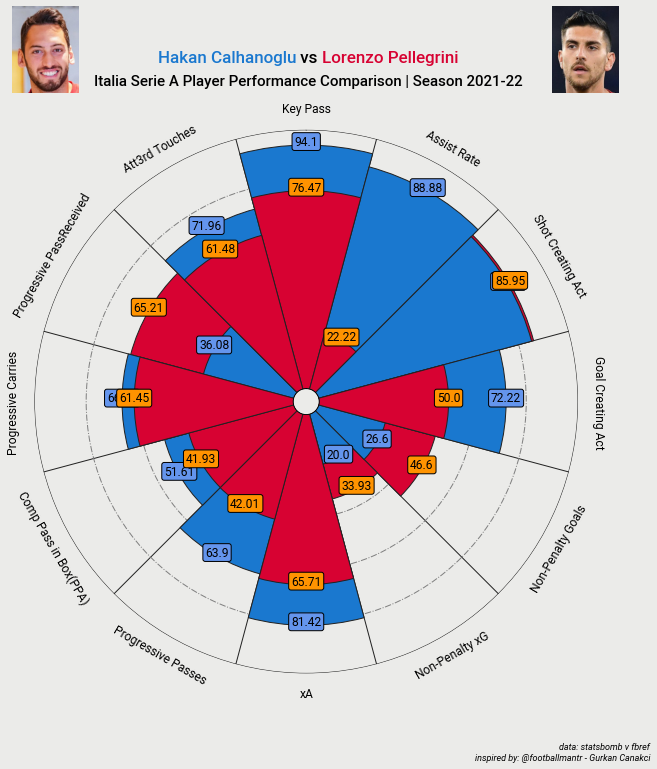

In [308]:
# parameter and values list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
params = [
    "Key Pass", "Assist Rate", "Shot Creating Act", "Goal Creating Act", "Non-Penalty Goals",
    "Non-Penalty xG","xA", "Progressive Passes","Comp Pass in Box(PPA)" ,"Progressive Carries",
    "Progressive PassReceived","Att3rd Touches"
   
]
values = [94.1,88.88, 85.12,72.22, 26.6,20.0,81.42,63.90,51.61,66.14,36.08,71.96]    # for Hakan Calhanoglu
values_2 = [76.47,22.22,85.95,50.0,46.6,33.93,65.71,42.01,41.93,61.45,65.21, 61.48]  # for Lorenzo Pellegrini

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#222222",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#222222",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # comparison values
    figsize=(10, 10),             # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#d70232", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#000000", fontsize=12, fontproperties=font_normal.prop, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

# add title
fig_text(
    0.515, 0.99, "<Hakan Calhanoglu> vs <Lorenzo Pellegrini>", size=17, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#d70232'}],
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Italia Serie A Player Performance Comparison | Season 2021-22",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb v fbref"
CREDIT_2 = "inspired by: @footballmantr - Gurkan Canakci"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

ax_image = add_image(
    fdj_cropped, fig, left=0.1, bottom=0.9315, width=0.1, height=0.12
)   # these values might differ when you are plotting

ax_image = add_image(
    fdj_croppedb, fig, left=0.85, bottom=0.9315, width=0.1, height=0.12
)   # these values might differ when you are plotting



plt.show()